In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from os import listdir
from time import time

from Algorithms.Functions.DE import DE
from Algorithms.Functions.PSO import PSO

from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error


       y      x
0  10.07   77.6
1  14.73  114.9
2  17.94  141.1


Processing: 100%|████████████████████████████████████████| 100/100 [00:01<00:00, 93.04step/s]


[5.59789594e+02 2.39047939e-04]


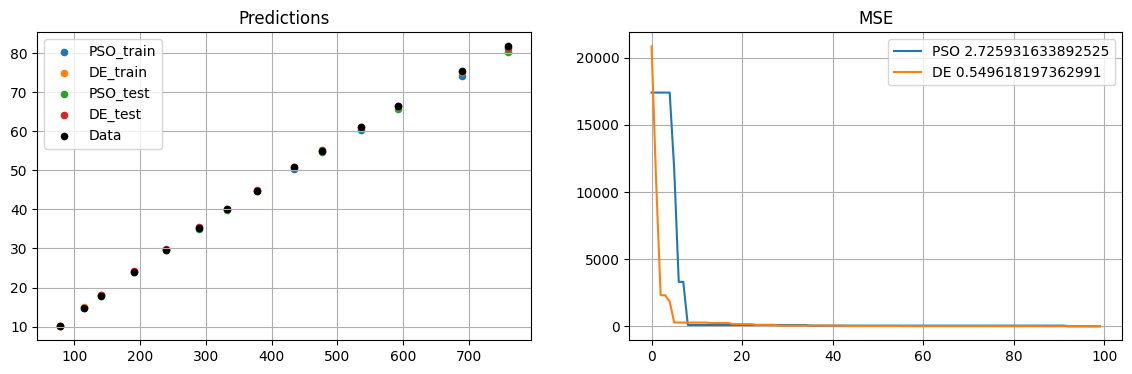

Processing: 100%|████████████████████████████████████████| 100/100 [00:01<00:00, 96.17step/s]


[9.52348289e+02 1.35111846e-04]


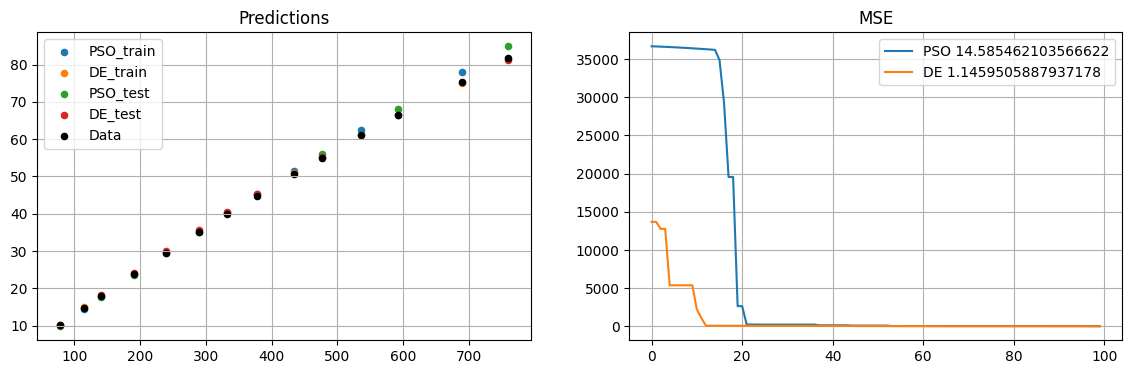

Processing: 100%|████████████████████████████████████████| 100/100 [00:01<00:00, 90.74step/s]


[5.62090994e+02 2.44224208e-04]


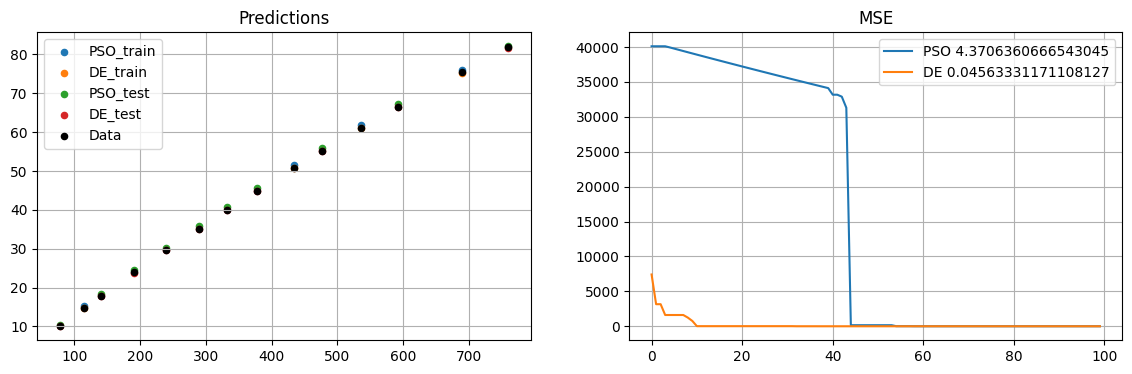

In [23]:

path = "."
lab_name = "Lab6"
if lab_name in listdir(path):
    path += "/" + lab_name
    if "Data" in listdir(path):
        path += "/Data"
        datas_path = [path + "/" + data for data in listdir(path)]
    else:
        raise Exception(f"Data directory in {lab_name} directory not found")
else:
    raise Exception(f"{lab_name} directory not found")

def var9(X, dat):
    b1, b2, b3, b4, b5 = X
    return b1 + b2 * np.exp(-b4 * dat) + b3 * np.exp(-b5 * dat)

def var10(X, dat):
    b1, b2 = X
    return b1 * (1 - 1/(np.sqrt(1 + 2 * b2 * dat)))

def var11(X, dat):
    b1, b2 = X
    return (b1 * b2) / (1 + b2 * dat)

lts = [9, 10, 11]
lts = [11]
lts = [10]
for i in lts:
    for data_path in datas_path:
            data = pd.read_excel(data_path, sheet_name=f"Var{i:02}")
            print(data.head(3))
            dat = data.to_numpy()
            test, train = train_test_split(dat, test_size=0.25)

            def funct9(X):
                return np.sum((test[:, 0] - var9(X, test[:, 1]))**2)

            def funct10(X):
                return np.sum((test[:, 0] - var10(X, test[:, 1]))**2)

            def funct11(X):
                return np.sum((test[:, 0] - var11(X, test[:, 1]))**2)

            funct9_limits = [[0, 10], [0, 5], *[[-2, 2] for _ in range(3)]]
            funct10_limits = [[100, 1000], [0, 1]]
            funct11_limits = [[100, 1000], [0, 1]]
            for _ in range(3):
                pso = PSO(100, 100, [0, 4], [-.15, .15], eval(f"funct{i}"), eval(f"funct{i}_limits"), plot=False, d3=False, d2=False, static=True, inf=True, more=True)
                de = DE(100, 100, eval(f"funct{i}"), eval(f"funct{i}_limits"), plot=False, d3=False, d2=False, static=True, inf=True, more=True)
                print(pso[1])
                fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(14, 4))
                ax1.set_title("Predictions")
                ax2.set_title("MSE")
                ax1.scatter(train[:, 1], eval(f"var{i}")(pso[1], train[:, 1]), label="PSO_train", s=20)
                ax1.scatter(train[:, 1], eval(f"var{i}")(de[1], train[:, 1]), label="DE_train", s=20)
                ax1.scatter(test[:, 1], eval(f"var{i}")(pso[1], test[:, 1]), label="PSO_test", s=20)
                ax1.scatter(test[:, 1], eval(f"var{i}")(de[1], test[:, 1]), label="DE_test", s=20)
                ax1.scatter(dat[:, 1], dat[:, 0], color="black", label="Data", s=20)
                ax1.legend()
                ax1.grid(True)
                
                ax2.plot(pso[4], label=f"PSO {pso[0]}")
                ax2.plot(de[4], label=f"DE {de[0]}")
                ax2.legend()
                ax2.grid(True)
                
                plt.show()